In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("k-means.csv", header  = None, sep = '\t')

for i in df.columns:
    df[i] = df[i].apply(lambda x : float(x.replace(',', '.')))
df.columns  = ['x', 'y']

df.head()

,x,y
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894


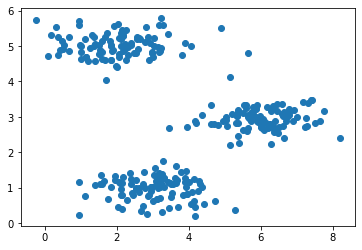

In [2]:
import matplotlib.pyplot as plt

plt.scatter(df['x'], df['y'])

In [3]:
number_of_clusters = 3
import random 
import numpy as np 

def distance_to_centroid(X, Y):
        return np.linalg.norm(X - Y)
    
def buildKmeans():
    c  = [[random.randint(1, 10), random.randint(1, 10)], 
          [random.randint(1, 10), random.randint(1, 10)], 
          [random.randint(1, 10), random.randint(1, 10)]]
    
    points = [[], [], []] 
    cluster1 = [[], []]
    cluster2 = [[], []]
    cluster3 = [[], []]

    centroids_history = []
    flag = True
    count = 0

    number_of_clusters = 3

    for i in range(30):
            cluster1[0].append(c[0][0])
            cluster1[1].append(c[0][1])

            cluster2[0].append(c[1][0])
            cluster2[1].append(c[1][1])

            cluster3[0].append(c[2][0])
            cluster3[1].append(c[2][1])

            points = [[], [], []] 
            
            for k, j in zip(df['x'], df['y']):
                distance = []
                
                for c2 in c:
                    arr = np.array([k, j])
                    distance.append(distance_to_centroid(c2, arr))
                    
                points[distance.index(min(distance))].append([k, j])
                
            f = True

            for check in c:
                if len(check) == 0:
                    f = False
            for p in points:
                if len(p) == 0:
                    f = False   

            if f == True:       
                for n in range(len(c)):
                    c[n] = list(np.mean(points[n], axis = 0))
    clusters = [cluster1, cluster2, cluster3]
    return c, points, clusters
        

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from itertools import chain

kmeans_model = KMeans(n_clusters=3)
kmeans_model.fit(df)

print('Clusters \n', kmeans_model.cluster_centers_)
d = [[0.3, 5.2], [2, 4.4], [1.1, 5.2], [5.2, 2.9], [5.3, 3.3], [6.1, 2.8]]

print('Prediction : ', kmeans_model.predict(d))

score = silhouette_score(df, kmeans_model.labels_)
print('Silhouette = ', score)

def verification_test(my_centroids, sk_centroids):
    flatten_my = list(chain.from_iterable(my_centroids))
    flatten_sk = list(chain.from_iterable(sk_centroids))
    
    flatten_my = [round(x, 3) for x  in flatten_my]
    flatten_sk = [round(x, 3) for x  in flatten_sk]
    
    if set(flatten_my) == set(flatten_sk):
        return True
    return False

t = True
c, points, clusters = buildKmeans()

while t or verification_test(c, kmeans_model.cluster_centers_) == False:
    if t!= True:
        print('IT DID NOT PASS ALL THE STAGES')
        break
    t = False
    
    c, points, clusters = buildKmeans()

print('IT PASSED ALL THE STAGES')

Clusters 
 [[3.04367119 1.01541041]
 [1.95399466 5.02557006]
 [6.03366736 3.00052511]]
Prediction :  [1 1 1 2 2 2]
Silhouette =  0.6900993728779541
IT DID NOT PASS ALL THE STAGES
IT PASSED ALL THE STAGES


In [5]:
clustersX = [[], [], []]
clustersY = [[], [], []]

for i in range(3):
    for j in range(len(points[i])):
        clustersX[i].append(points[i][j][0])
        clustersY[i].append(points[i][j][1])

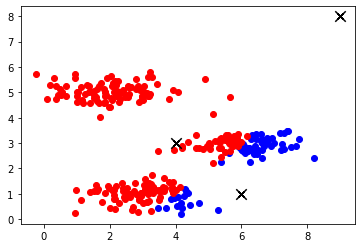

In [6]:
plt.scatter(clustersX[0], clustersY[0], color ="g")
plt.scatter(clustersX[1], clustersY[1], color ="b")
plt.scatter(clustersX[2], clustersY[2], color ="r")
#######################################################################
plt.plot(clusters[0][0], clusters[0][1], marker = 'x', color = 'black')
plt.plot(clusters[1][0], clusters[1][1], marker = 'x', color = 'black')
plt.plot(clusters[2][0], clusters[2][1], marker = 'x', color = 'black')
#######################################################################
plt.scatter(c[0][0], c[0][1], marker = 'x',color = 'black', s = 110)
plt.scatter(c[1][0], c[1][1], marker = 'x',color = 'black', s = 110)
plt.scatter(c[2][0], c[2][1], marker = 'x',color = 'black', s = 110)

plt.show()

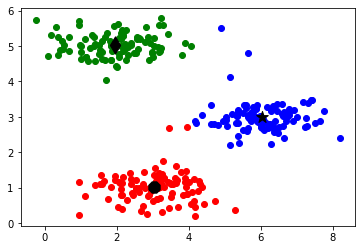

In [7]:
cls = []
df['res'] = kmeans_model.predict(df.values)
for  i in df.res.unique():
    cls.append(df[df.res == i])

plt.scatter(cls[0]['x'], cls[0]['y'], color = 'green')
plt.scatter(cls[1]['x'], cls[1]['y'], color = 'blue')
plt.scatter(cls[2]['x'], cls[2]['y'], color = 'red')

plt.scatter(kmeans_model.cluster_centers_[0][0],kmeans_model.cluster_centers_[0][1], marker = '8', color = 'black', s = 150)
plt.scatter(kmeans_model.cluster_centers_[1][0],kmeans_model.cluster_centers_[1][1], marker = 'd', color = 'black', s = 150)
plt.scatter(kmeans_model.cluster_centers_[2][0],kmeans_model.cluster_centers_[2][1], marker = '*', color = 'black', s = 150)

plt.show()